In [150]:
#%%
import polars as pl
import numpy as np
import pandas as pd
from scipy import signal
import io
from scipy import ndimage
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
from scipy.signal import welch
#%%
df = pd.read_parquet('./labels&feature/'+'yd003.parquet', engine='pyarrow')
ma = df[['z']]/9800
ma.index = pd.to_datetime(df['Unnamed: 0']).astype(np.int64)
ma = ma.dropna()
fs = 1e-09**-1/np.median(np.diff(ma.index.values.astype(np.int64)))
tm = pd.to_datetime(ma.index)
#%%
def bandpass_filt(sig,cutoff,fs,mode):
    nyq = 0.5*fs
    wn = cutoff/nyq
    sos = signal.butter(4, wn, btype=mode,output='sos')
    if isinstance(sig,pd.DataFrame):
        # if you gave in a dataframe, get it back with the appropriate columns
        return pd.DataFrame(data=signal.sosfiltfilt(sos,sig,axis=0),columns=sig.columns,index=sig.index)
    elif isinstance(sig,pd.Series):
        return pd.DataFrame(data=signal.sosfiltfilt(sos,sig,axis=0),columns=[sig.name],index=sig.index)
    else:
        return signal.sosfiltfilt(sos,sig,axis=0)


In [173]:
tm = df['z']

In [200]:
tm.index = df['Unnamed: 0']

In [201]:
tm = tm.dropna()

In [ ]:
tm = pd.to_datetime(df.index)

In [149]:
ma.iloc[1:10]

,z
Unnamed: 0,
1681851674054000000,0.545510
1681851674055000000,0.550306
1681851674056000000,0.545000
1681851674057000000,0.549898
1681851674058000000,0.556429
1681851674059000000,0.550918
1681851674060000000,0.557449
1681851674061000000,0.554184
1681851674062000000,0.569490


In [86]:
tm = pd.to_datetime(ma.index)

In [57]:
ma.index = pd.to_datetime(df['Unnamed: 0']).astype(np.int64)

ValueError: Length mismatch: Expected axis has 30535852 elements, new values have 30671447 elements

In [225]:
a = float(1000)

In [228]:
tm.index = pd.to_datetime(tm.index)

In [229]:
fs = 1e-09**-1/np.median(np.diff(tm.index.values).astype(np.int64))

In [230]:
# %%
sn_df = bandpass_filt(ma,(60,100),fs,'bandpass')
sn_df.index = pd.to_datetime(tm.index)
# %%
pw = sn_df**2

# test = pw.resample('2min').sum()

In [202]:
pw.index = pd.to_datetime(tm.index)

Text(0.5, 1.0, 'Patien 1 snoring detection')

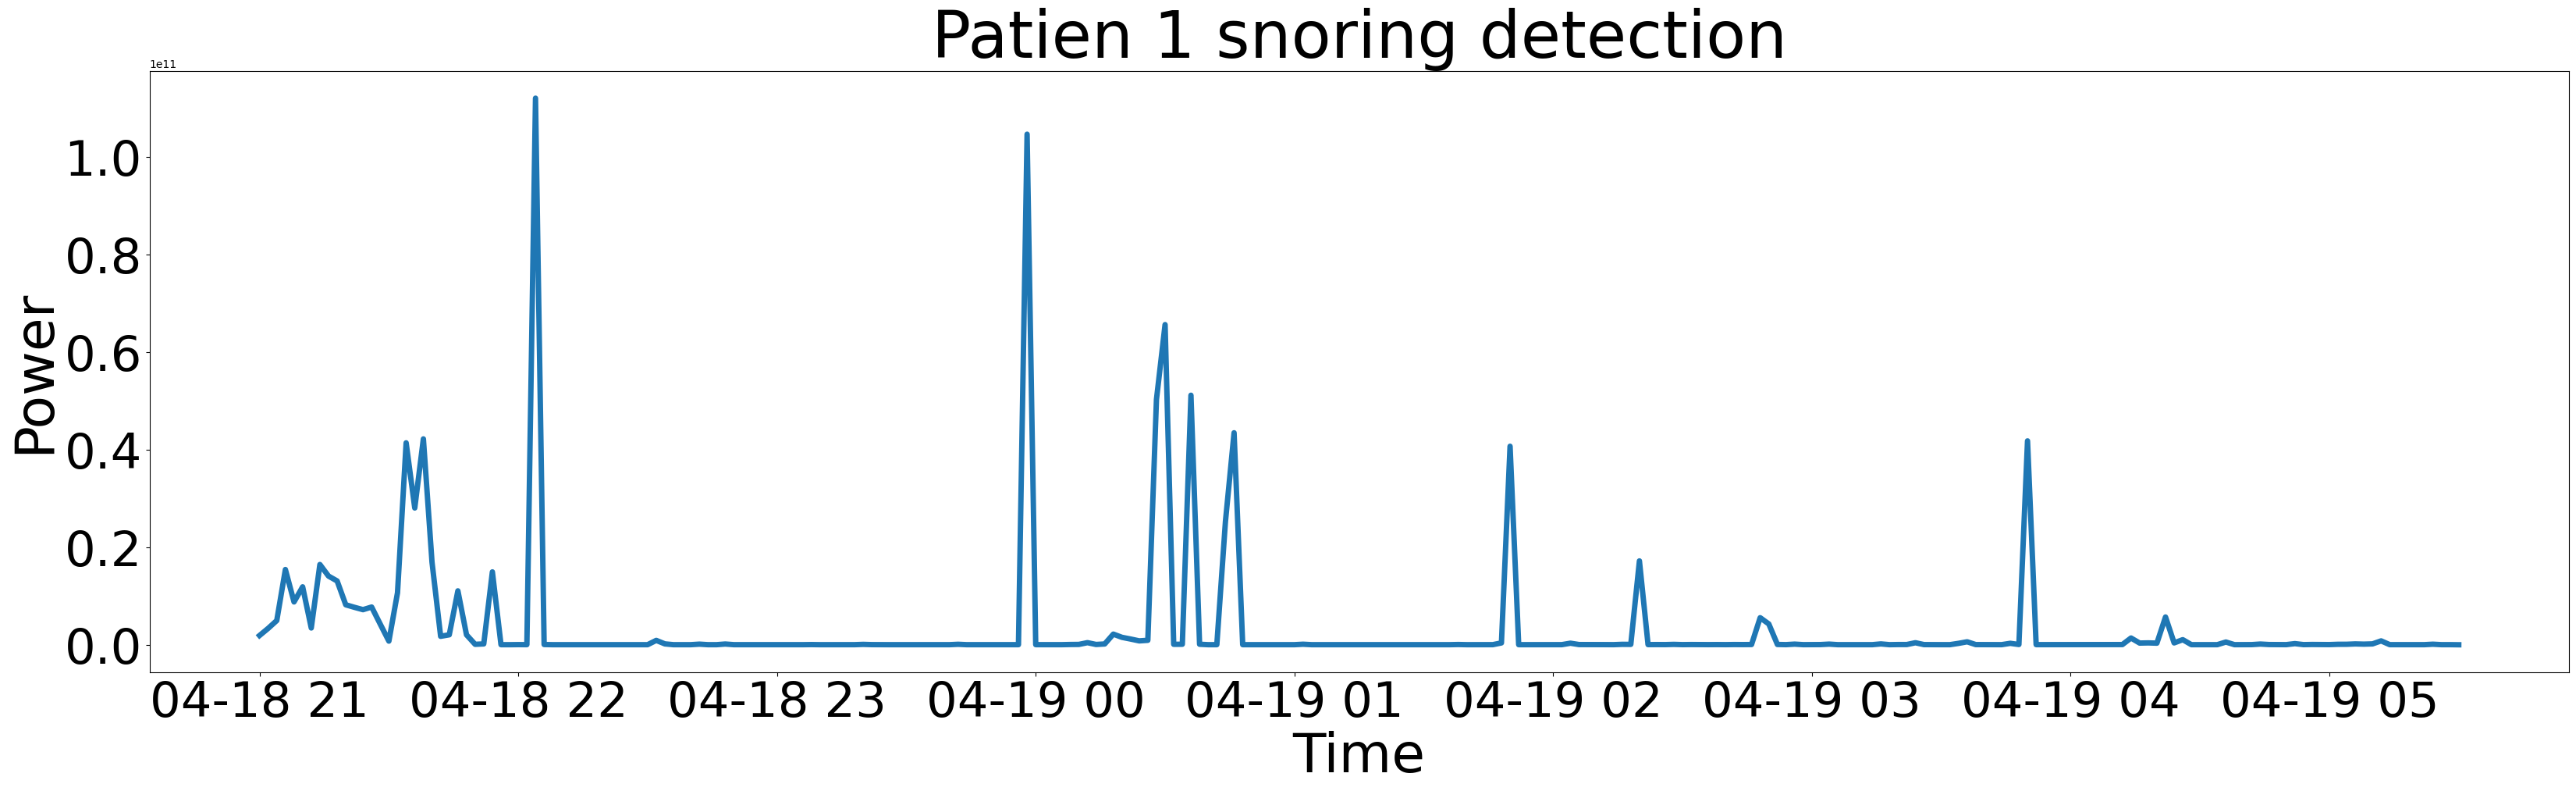

: 

In [89]:
plt.figure(figsize=(40,10))
plt.plot(test,linewidth=5)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
plt.ylabel('Power',fontsize=50)
plt.xlabel('Time',fontsize=50)
plt.title("Patient 1 snoring detection",fontsize=60)

In [44]:
ma.index = pd.to_datetime(ma.index)

In [8]:
tm = pd.to_datetime(ma.index[10679000:10680000])

Text(0.5, 0, 'time(mm:ss.ms)')

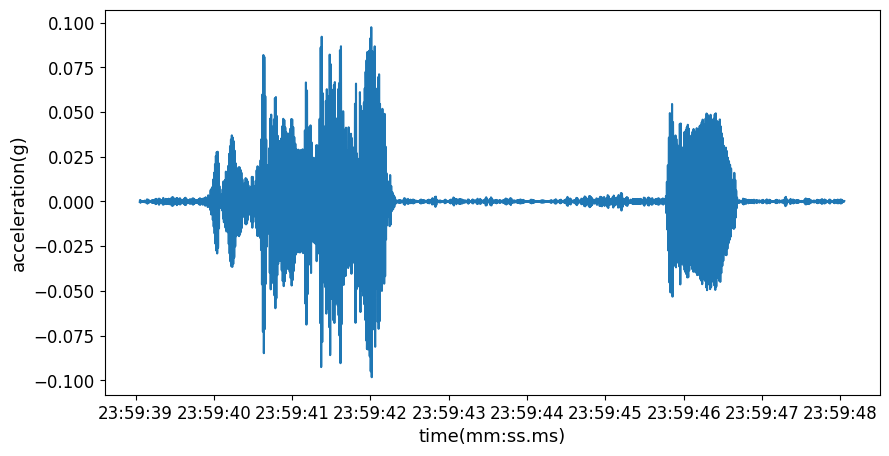

In [232]:

plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(sn_df.index)[10705000:10714000],sn_df[10705000:10714000])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('acceleration(g)',fontsize = 13)
plt.xlabel('time(mm:ss.ms)',fontsize = 13)


Text(0.5, 0, 'time(mm:ss.ms)')

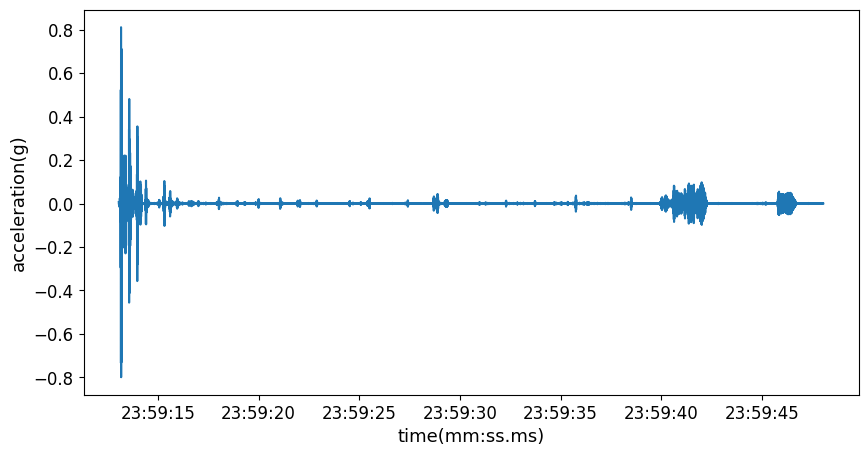

In [235]:

plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(sn_df.index)[10679000:10714000],sn_df[10679000:10714000])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('acceleration(g)',fontsize = 13)
plt.xlabel('time(mm:ss.ms)',fontsize = 13)

Text(0.5, 0, 'time(hh:mm:ss)')

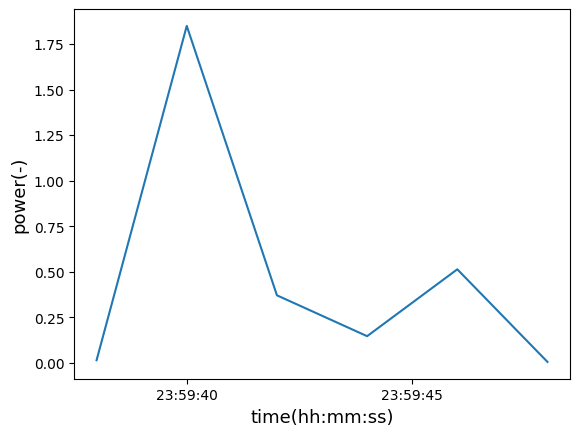

In [297]:
pw_2s = pw.resample('2s').sum()
plt.plot(pw_2s[int(10704000/2000):int(10716000/2000)])
plt.ylabel('power(-)',fontsize = 13)
plt.xlabel('time(hh:mm:ss)',fontsize = 13)

In [304]:
pw_2s.index[sn_pk[51]]

Timestamp('2023-04-19 05:25:34', freq='2S')

In [246]:
sn_pk,_ = signal.find_peaks(pw_2s.values.flatten(),height=(0.1,3),distance=2)

In [265]:
sn_pk,_ = signal.find_peaks(pw_2s.values.flatten(),height=(0.2,3),distance=5)

In [217]:
pw = sn_df**2

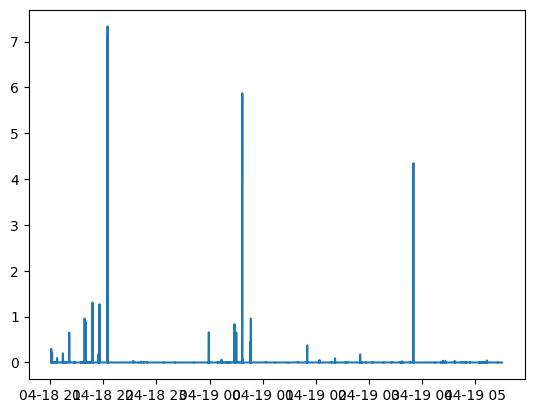

In [236]:
plt.plot(pw)

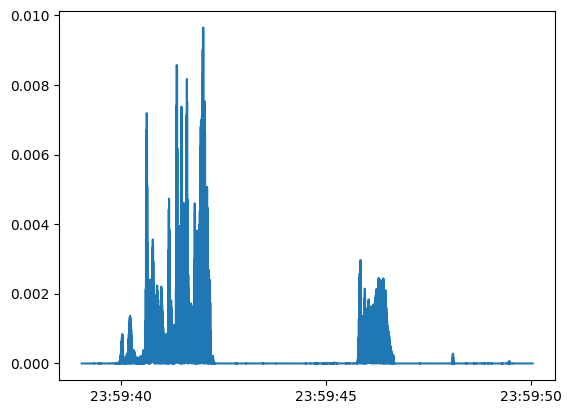

In [237]:
plt.plot(pw[10705000:10716000])

In [ ]:
pw.clip

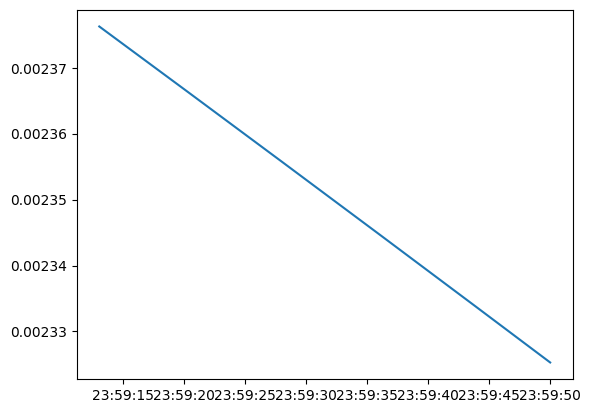

In [215]:
plt.plot(pw[10679000:10716000])

In [65]:
test = sn_df[10679000:10680000]

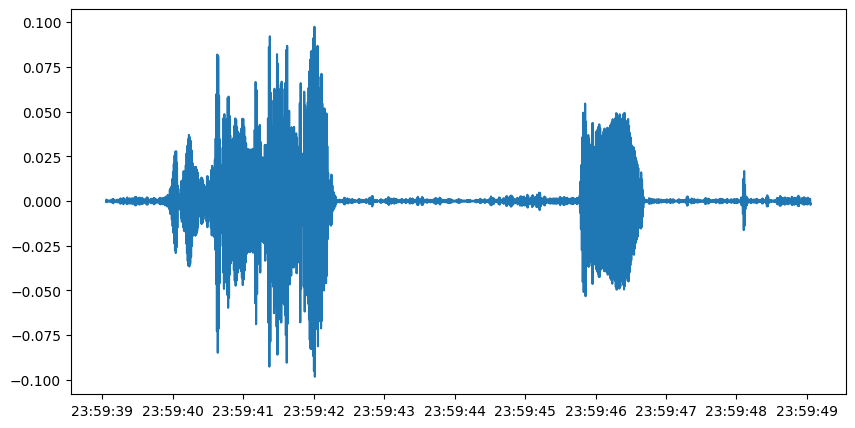

In [185]:
plt.figure(figsize=(10,5))
plt.plot(sn_df[10705000:10715000])

In [259]:
cwt_se,cwt_mtx,cwt_pk = do_cwt(sn_df)
mtx = cwt_mtx.astype(float)

C:\Users\13103\AppData\Local\Temp\ipykernel_86936\799806716.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  mtx = cwt_mtx.astype(float)


C:\Users\13103\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\image.py:175: UserWarning: Data with more than 2**23 columns cannot be accurately displayed. Downsampling to less than 2**23 columns before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**23 columns'))


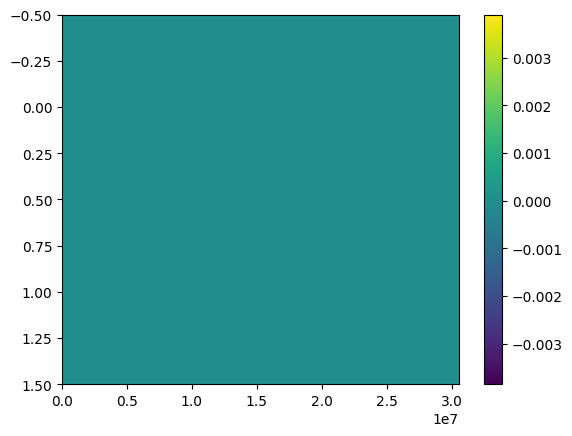

In [260]:
plt.imshow(mtx,norm = 'linear', interpolation='antialiased',aspect='auto')
plt.colorbar()
plt.show()


In [244]:
tm = pd.to_datetime(tm.index)

In [249]:
pw_2s.index[sn_pk]

DatetimeIndex(['2023-04-18 21:01:42', '2023-04-18 21:02:16',
               '2023-04-18 21:04:12', '2023-04-18 21:06:52',
               '2023-04-18 21:07:30', '2023-04-18 21:08:06',
               '2023-04-18 21:08:24', '2023-04-18 21:08:30',
               '2023-04-18 21:10:18', '2023-04-18 21:13:54',
               ...
               '2023-04-19 05:12:02', '2023-04-19 05:12:28',
               '2023-04-19 05:12:32', '2023-04-19 05:12:42',
               '2023-04-19 05:12:46', '2023-04-19 05:12:54',
               '2023-04-19 05:13:00', '2023-04-19 05:13:10',
               '2023-04-19 05:13:18', '2023-04-19 05:25:34'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=178, freq=None)

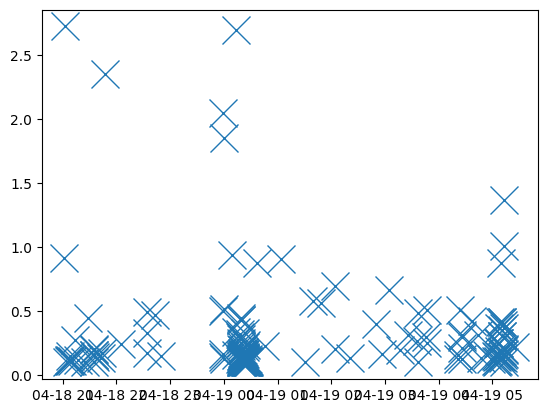

In [251]:
plt.plot(pw_2s.index[sn_pk],pw_2s.iloc[sn_pk], "x",markersize=20)

Text(0.5, 1.0, 'Patient 3 female snoring detection')

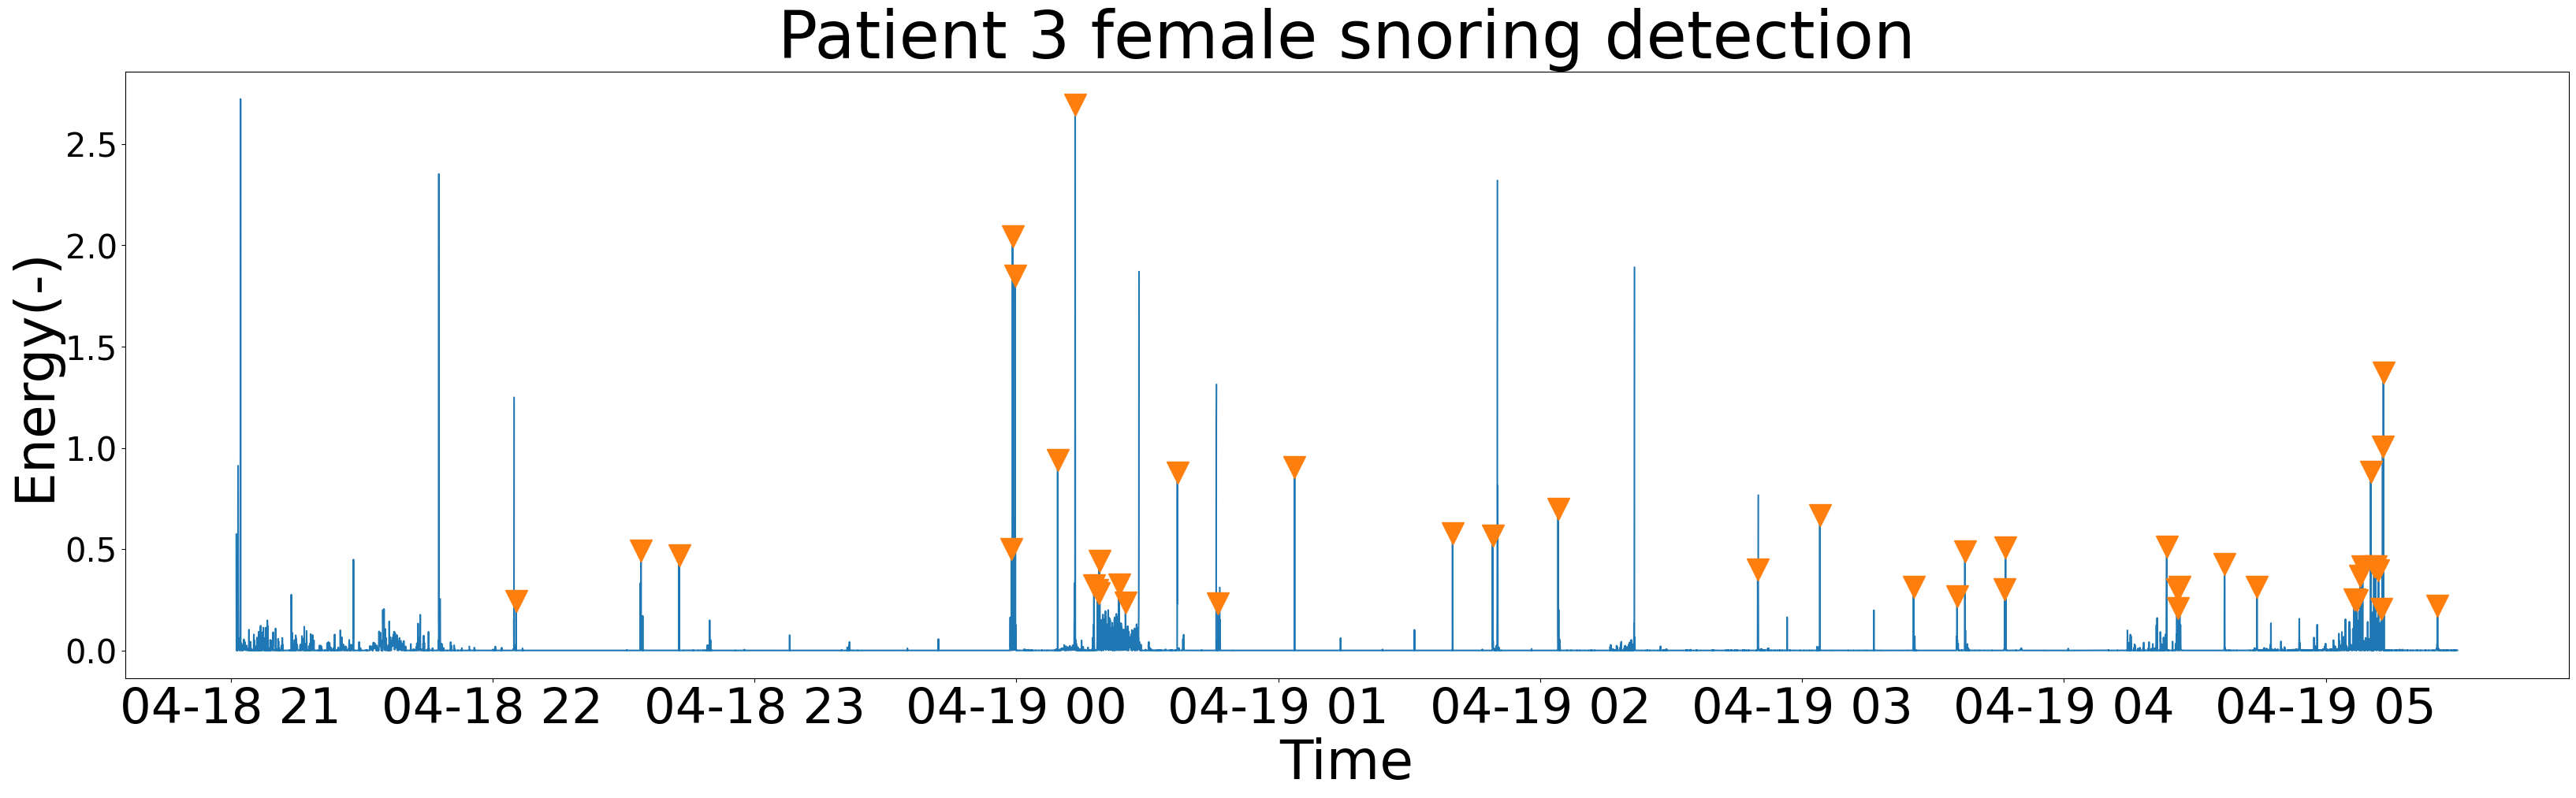

In [285]:
plt.figure(figsize = (40,10))
plt.plot(pw_2s)
plt.plot(pw_2s.index[sn_pk[7:]],pw_2s.iloc[sn_pk[7:]], "v",markersize=20)
plt.xticks(fontsize=45)
plt.yticks(fontsize=30,)
plt.ylabel('Energy(-)',fontsize=50)
plt.xlabel('Time',fontsize=50)
plt.title("Patient 3 female snoring detection",fontsize=60)


In [288]:
sn_pk[30:]

array([11828, 11882, 12155, 12161, 13269, 13339, 13348, 13358, 13666,
       13889, 14557, 14573, 14600, 14615, 14671, 14693, 14703, 14724,
       14746, 14753, 14758, 15130], dtype=int64)

In [290]:
pw_2s.iloc[30:]

,z
Unnamed: 0,
2023-04-18 21:02:14,0.239894
2023-04-18 21:02:16,2.722061
2023-04-18 21:02:18,0.040535
2023-04-18 21:02:20,0.000945
2023-04-18 21:02:22,0.002612
...,...
2023-04-19 05:30:00,0.001188
2023-04-19 05:30:02,0.001029
2023-04-19 05:30:04,0.000709


Text(0.5, 1.0, 'Patient 3 female snoring detection False Positive')

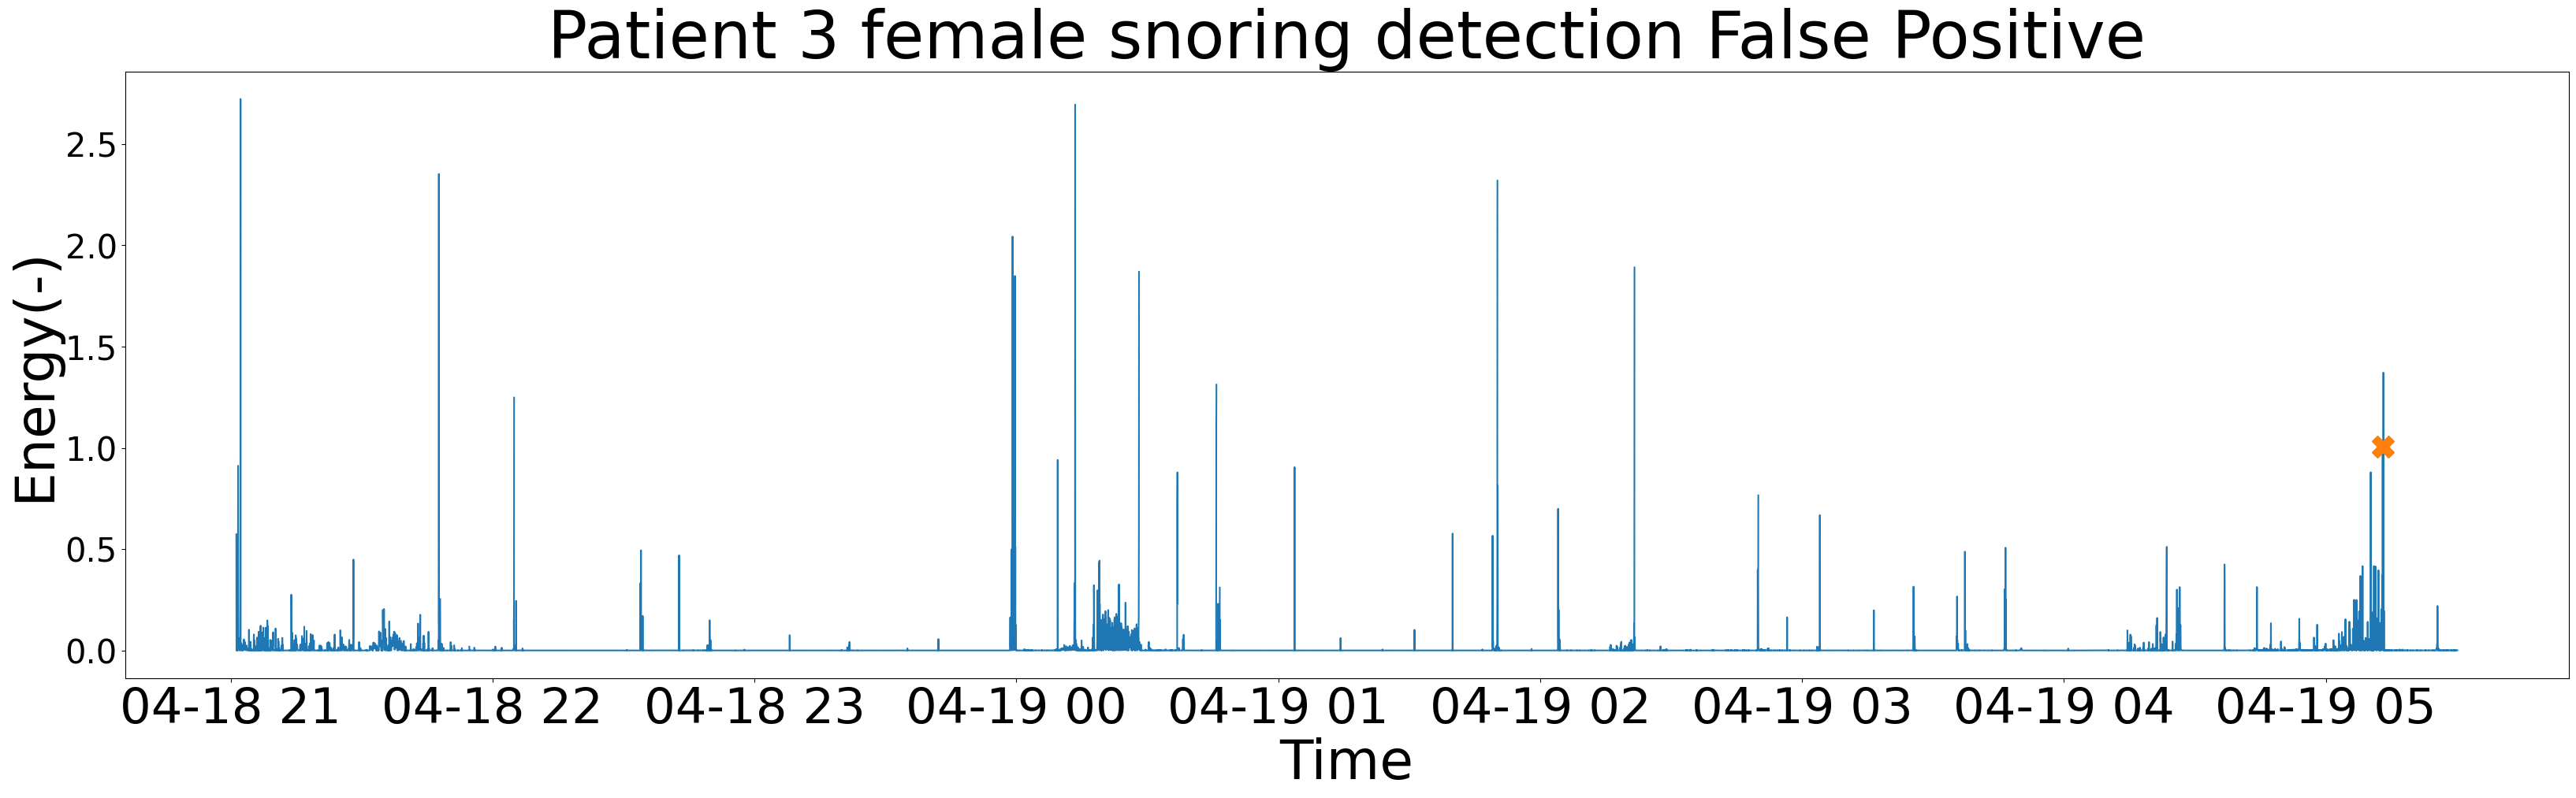

In [294]:
plt.figure(figsize = (40,10))
plt.plot(pw_2s)
plt.plot(pw_2s.index[sn_pk[49]],pw_2s.iloc[sn_pk[49]], "X",markersize=20)
plt.xticks(fontsize=45)
plt.yticks(fontsize=30,)
plt.ylabel('Energy(-)',fontsize=50)
plt.xlabel('Time',fontsize=50)
plt.title("Patient 3 female snoring detection False Positive",fontsize=60)

In [271]:
pw_2s.index[807]

Timestamp('2023-04-18 21:28:08', freq='2S')

In [262]:
a = pw_2s[pw_2s>2]

In [263]:
a.dropna()

,z
Unnamed: 0,
2023-04-18 21:02:16,2.722061
2023-04-18 21:47:42,2.352098
2023-04-18 23:59:08,2.043210
2023-04-19 00:13:28,2.694599
2023-04-19 01:50:12,2.318996


In [247]:
pw_2s[pw_2s>3] = np.nan

In [ ]:
t

Text(0.5, 1.0, 'Patient 3 female snoring detection')

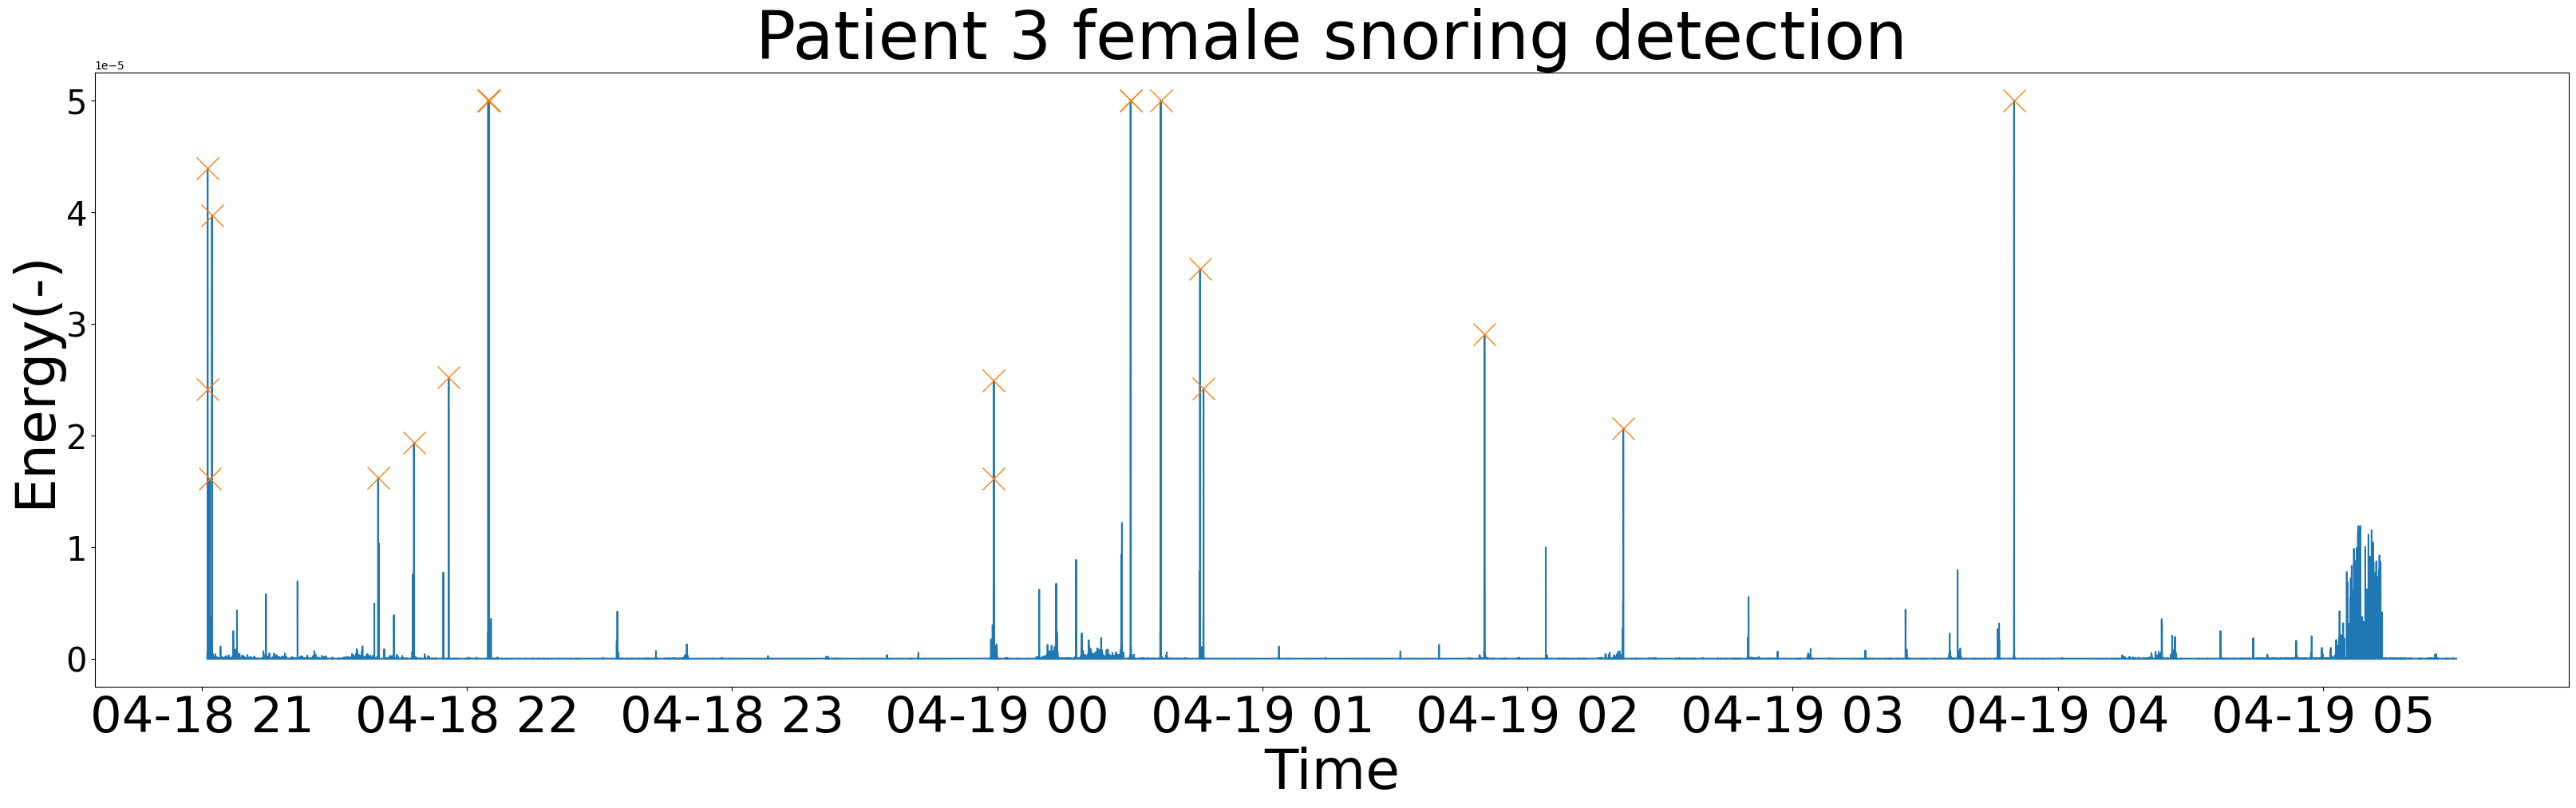

In [261]:
plt.figure(figsize = (40,10))
plt.plot(tm,cwt_se.clip(0,5e-5))
plt.plot(tm[peaks], cwt_se[peaks].clip(0,5e-5), "x",markersize=20)
plt.xticks(fontsize=45)
plt.yticks(fontsize=30,)
plt.ylabel('Energy(-)',fontsize=50)
plt.xlabel('Time',fontsize=50)
plt.title("Patient 3 female snoring detection",fontsize=60)


In [101]:
a = cwt_se[peaks]

In [85]:
peaks,_ = signal.find_peaks(cwt_se,height=1.5e-5,distance=200)

In [108]:
peaks[12]

12535963

In [258]:
def do_cwt(csv):
    fs = 1e-09**-1/np.median(np.diff(csv.index.values.astype(np.int64)))
    csv = pd.DataFrame(csv)
    test_bp = bandpass_filt(csv,(20,51),fs,'bandpass')
    test_bp = test_bp.to_numpy().flatten()
    cwtmtx = signal.cwt(test_bp,signal.morlet,np.arange(2,4))
    # tm = pd.to_datetime(csv.index)

    ## find cwt local maxiums 
    # cwt_pk = cwtmtx.T[:,1:15]
    cwt_pk = cwtmtx.T
    cwt_pks = cwt_pk.max(axis=1)


    #use shannon energy to process oscaliating signal
    cwt_se = shannon_energy(cwt_pks)
    cwt_se_gs = ndimage.gaussian_filter(np.abs(cwt_se),sigma=25)#sigma is taken from the average heart sound lobe of 100ms 0.1*fs/4

    
    return cwt_se_gs,cwtmtx,cwt_pk

def shannon_energy(x):
    x_env = -x**2 * np.log(x**2)
    return(x_env)


DatetimeIndex(['1970-01-01 00:00:00.010705001',
               '1970-01-01 00:00:00.010705002',
               '1970-01-01 00:00:00.010705003',
               '1970-01-01 00:00:00.010705004',
               '1970-01-01 00:00:00.010705005',
               '1970-01-01 00:00:00.010705006',
               '1970-01-01 00:00:00.010705007',
               '1970-01-01 00:00:00.010705008',
               '1970-01-01 00:00:00.010705009',
               '1970-01-01 00:00:00.010705010',
               ...
               '1970-01-01 00:00:00.010714991',
               '1970-01-01 00:00:00.010714992',
               '1970-01-01 00:00:00.010714993',
               '1970-01-01 00:00:00.010714994',
               '1970-01-01 00:00:00.010714995',
               '1970-01-01 00:00:00.010714996',
               '1970-01-01 00:00:00.010714997',
               '1970-01-01 00:00:00.010714998',
               '1970-01-01 00:00:00.010714999',
                  '1970-01-01 00:00:00.010715'],
              dtype=

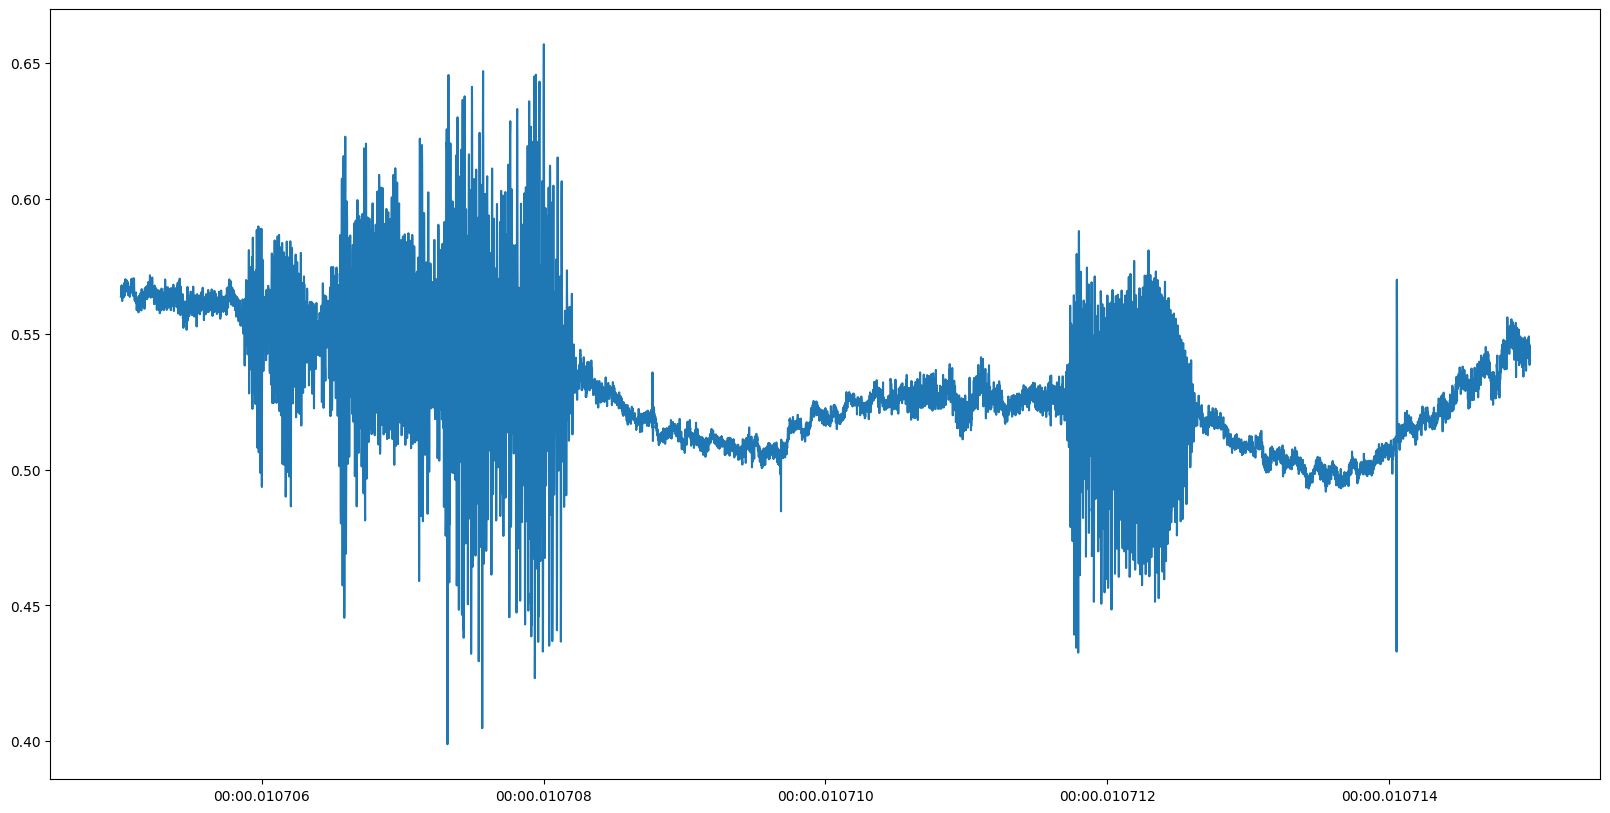

In [171]:
plt.figure(figsize=(20,10))
plt.plot(tm[10705000:10715000],ma[10705000:10715000])

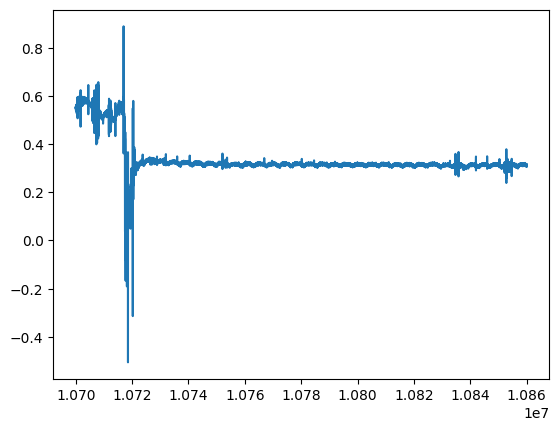

In [166]:
plt.plot(ma[10700000:10860000])

In [91]:
fn = tm[peaks]

In [92]:
fn

DatetimeIndex(['2023-04-18 21:01:17.577000', '2023-04-18 21:01:17.955000',
               '2023-04-18 21:01:45.743000', '2023-04-18 21:02:17.377000',
               '2023-04-18 21:39:53.045000', '2023-04-18 21:47:59.548000',
               '2023-04-18 21:55:50.907000', '2023-04-18 22:04:47.484000',
               '2023-04-18 22:04:50.726000', '2023-04-18 22:04:58.566000',
               '2023-04-18 23:59:13.181000', '2023-04-18 23:59:13.581000',
               '2023-04-19 00:30:10.016000', '2023-04-19 00:30:12.747000',
               '2023-04-19 00:36:59.863000', '2023-04-19 00:45:52.663000',
               '2023-04-19 00:46:39.596000', '2023-04-19 01:50:15.391000',
               '2023-04-19 02:21:39.362000', '2023-04-19 03:50:05.702000'],
              dtype='datetime64[ns]', name='Unnamed: 0', freq=None)

In [268]:
import polars as pl
import numpy as np
from scipy.io import wavfile

fs = 1000
id = 0
for pk in sn_pk:
    pk = pk*2000
    fn = tm[pk]
    rs = pk-5000
    ls = pk+10000
    if rs<0:
        rs=0
    z = ma['z'][rs:ls].to_numpy()
    print(z)
    z = z * int(32767 / max(max(z), abs(min(z))))
    z = z.astype(np.int16)
    wavfile.write("./audio/"f'{id}out.wav', fs, z)
    id = id+1

[0.25714286 0.25540816 0.25357143 ... 0.37071429 0.37622449 0.37469388]
[0.15244898 0.15520408 0.15673469 ... 0.21306122 0.21357143 0.21010204]
[0.39867347 0.3972449  0.39908163 ... 0.45       0.44897959 0.43826531]
[0.55081633 0.55234694 0.55520408 ... 0.49591837 0.49571429 0.49602041]
[ 0.45622449  0.45734694  0.45857143 ...  0.29469388  0.09112245
 -0.11387755]
[0.60887755 0.12030612 0.29959184 ... 0.46653061 0.46785714 0.46520408]
[0.72734694 0.72653061 0.72530612 ... 0.74540816 0.74112245 0.74346939]
[0.18153061 0.17897959 0.18173469 ... 0.17938776 0.17785714 0.17877551]
[0.44183673 0.4455102  0.43836735 ... 0.40877551 0.40693878 0.40806122]
[0.38081633 0.3827551  0.37979592 ... 0.385      0.3855102  0.38561224]
[0.71102041 0.7177551  0.71744898 ... 0.24918367 0.24642857 0.2477551 ]
[0.2477551  0.24469388 0.24734694 ... 0.43255102 0.43255102 0.42469388]
[0.54714286 0.54295918 0.54683673 ... 0.55816327 0.5594898  0.55928571]
[0.31122449 0.30918367 0.31010204 ... 0.31020408 0.313469

C:\Users\13103\AppData\Local\Temp\ipykernel_86936\562701314.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  z = ma['z'][rs:ls].to_numpy()


In [162]:
(pk-5000)

-1476

In [160]:
ma['z'][(pk-5000):(pk+5000)]

C:\Users\13103\AppData\Local\Temp\ipykernel_86936\4152076251.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ma['z'][(pk-5000):(pk+5000)]


Series([], Name: z, dtype: float64)

In [ ]:
import polars as pl
import numpy as np
from scipy.io import wavfile

fs = 3333
df = pl.read_csv("voc-000_VOC010.csv")
z = df['z'].to_numpy()
print(z)
z = z * int(32767 / max(max(z), abs(min(z))))
z = z.astype(np.int16)
wavfile.write(f'out.wav', fs, z)

In [175]:
fn = 'testt'
fs = 1000
z = ma['z'][10670000:10715000].to_numpy()
print(z)
z = z * int(32767 / max(max(z), abs(min(z))))
z = z.astype(np.int16)
wavfile.write(f'{fn}out.wav', fs, z)
id = id+1

[0.24959184 0.24530612 0.24632653 ... 0.54571429 0.54071429 0.5405102 ]


C:\Users\13103\AppData\Local\Temp\ipykernel_86936\4164892477.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  z = ma['z'][10670000:10715000].to_numpy()
